<center> 
<h1> Objective: Binary Classification of 10-year risk of coronary heart disease dataset
</center>

# Data Import and Basic Analysis

In [1]:
# Importing dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
%matplotlib inline

In [2]:
# Reading the data
df = pd.read_csv('framingham.csv')
df.shape

(4240, 16)

In [3]:
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [4]:
df.tail()

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
4235                0             0         0    248.0  131.0   72.0  22.00   
4236                0             0         0    210.0  126.5   87.0  19.16   
4237                0             0         0    269.0  133.5   83.0  21.47   
4238                0             1         0    185.0  141.0   98.0  25.60   
4239                0             0         0    196.0  133.0   86.0  20.91   

      heartRate  glucose  TenYearCHD  
4235       84.0     86.0           0  
4236       86.0      NaN           0  
4237       80.0    107.0           0  
4238       67.0     72.0           0  
4239       85.0     80.0           0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [6]:
df.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4240.000000  4240.000000  4135.000000    4240.000000  4211.000000   
mean      0.429245    49.580189     1.979444       0.494104     9.005937   
std       0.495027     8.572942     1.019791       0.500024    11.922462   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4187.000000      4240.000000   4240.000000  4240.000000  4190.000000   
mean      0.029615         0.005896      0.310613     0.025708   236.699523   
std       0.169544         0.076569      0.462799     0.158280    44.591284   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4240.000000  4240.000000  4221.000000  4239.000000  3852.000000   
mean    132.354599    82.897759    25.800801    75.878981    81.963655   
std      22.033300    11.910394     4.079840    12.025348    23.954335   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    90.000000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4240.000000  
mean      0.151887  
std       0.358953  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [7]:
df.corr()

male       age  education  currentSmoker  cigsPerDay  \
male             1.000000 -0.029014   0.017415       0.197026    0.317143   
age             -0.029014  1.000000  -0.166356      -0.213662   -0.192959   
education        0.017415 -0.166356   1.000000       0.018528    0.008323   
currentSmoker    0.197026 -0.213662   0.018528       1.000000    0.769774   
cigsPerDay       0.317143 -0.192959   0.008323       0.769774    1.000000   
BPMeds          -0.052504  0.123052  -0.010898      -0.048927   -0.046155   
prevalentStroke -0.004550  0.057679  -0.035142      -0.032980   -0.032711   
prevalentHyp     0.005853  0.306799  -0.081726      -0.103710   -0.066645   
diabetes         0.015693  0.101314  -0.038749      -0.044285   -0.037089   
totChol         -0.070413  0.262554  -0.023613      -0.046488   -0.026479   
sysBP           -0.035879  0.394053  -0.129496      -0.130281   -0.088797   
diaBP            0.058199  0.205586  -0.061919      -0.107933   -0.056715   
BMI              0.081871  0.136096  -0.137747      -0.167857   -0.093293   
heartRate       -0.116932 -0.012843  -0.054182       0.062686    0.075564   
glucose          0.005979  0.122356  -0.035843      -0.056726   -0.058886   
TenYearCHD       0.088374  0.225408  -0.054248       0.019448    0.057755   

                   BPMeds  prevalentStroke  prevalentHyp  diabetes   totChol  \
male            -0.052504        -0.004550      0.005853  0.015693 -0.070413   
age              0.123052         0.057679      0.306799  0.101314  0.262554   
education       -0.010898        -0.035142     -0.081726 -0.038749 -0.023613   
currentSmoker   -0.048927        -0.032980     -0.103710 -0.044285 -0.046488   
cigsPerDay      -0.046155        -0.032711     -0.066645 -0.037089 -0.026479   
BPMeds           1.000000         0.117370      0.261067  0.052060  0.080623   
prevalentStroke  0.117370         1.000000      0.074791  0.006955  0.000105   
prevalentHyp     0.261067         0.074791      1.000000  0.077752  0.163632   
diabetes         0.052060         0.006955      0.077752  1.000000  0.040348   
totChol          0.080623         0.000105      0.163632  0.040348  1.000000   
sysBP            0.254194         0.057000      0.696656  0.111265  0.208734   
diaBP            0.194122         0.045153      0.615840  0.050260  0.164698   
BMI              0.100702         0.025909      0.301344  0.087068  0.115992   
heartRate        0.015230        -0.017674      0.146815  0.048986  0.091127   
glucose          0.051197         0.018440      0.086656  0.617630  0.046538   
TenYearCHD       0.087519         0.061823      0.177458  0.097344  0.082369   

                    sysBP     diaBP       BMI  heartRate   glucose  TenYearCHD  
male            -0.035879  0.058199  0.081871  -0.116932  0.005979    0.088374  
age              0.394053  0.205586  0.136096  -0.012843  0.122356    0.225408  
education       -0.129496 -0.061919 -0.137747  -0.054182 -0.035843   -0.054248  
currentSmoker   -0.130281 -0.107933 -0.167857   0.062686 -0.056726    0.019448  
cigsPerDay      -0.088797 -0.056715 -0.093293   0.075564 -0.058886    0.057755  
BPMeds           0.254194  0.194122  0.100702   0.015230  0.051197    0.087519  
prevalentStroke  0.057000  0.045153  0.025909  -0.017674  0.018440    0.061823  
prevalentHyp     0.696656  0.615840  0.301344   0.146815  0.086656    0.177458  
diabetes         0.111265  0.050260  0.087068   0.048986  0.617630    0.097344  
totChol          0.208734  0.164698  0.115992   0.091127  0.046538    0.082369  
sysBP            1.000000  0.783952  0.326906   0.182155  0.140573    0.216374  
diaBP            0.783952  1.000000  0.377360   0.181021  0.061075    0.145112  
BMI              0.326906  0.377360  1.000000   0.067451  0.087389    0.075300  
heartRate        0.182155  0.181021  0.067451   1.000000  0.094546    0.022907  
glucose          0.140573  0.061075  0.087389   0.094546  1.000000    0.125590  
TenYearCHD       0.216374  0.145112  0.075300   0.0229

In [8]:
# Checking for missing values
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Observations: A few of the features have missing values

In [9]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

Observation: No duplicates found

<h3> Splitting the features into numerical and categorical features

In [10]:
# Splitting the features into numerical and categorical features

categorical_features = [features for features in df.columns if df[features].dtypes == 'O' or features in ['male', 'currentSmoker', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD', 'BPMeds']]
print('\nNumber of object type categorical features in the dataset: ', len(categorical_features))
print(categorical_features)

numerical_features = [features for features in df.columns if df[features].dtypes != 'O' and features not in categorical_features]
print('Number of numerical features in the dataset: ', len(numerical_features))
print(numerical_features)


Number of object type categorical features in the dataset:  7
['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
Number of numerical features in the dataset:  9
['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


# Univariate Feature Analysis and Feature Engineering

Note: Since the dataset size is quite small, we will try to cap the values instead of removing them

In [11]:
features_with_na = [features for features in df.columns if df[features].isnull().sum() > 0]
print('Number of features with missing values: ', len(features_with_na))
print(features_with_na)

Number of features with missing values:  7
['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']


In [12]:
# Creating a new df for feature engineering
df_new = df.copy()

<h4> Categorical Features

Feature 0 (Target Feature): TenYearCHD

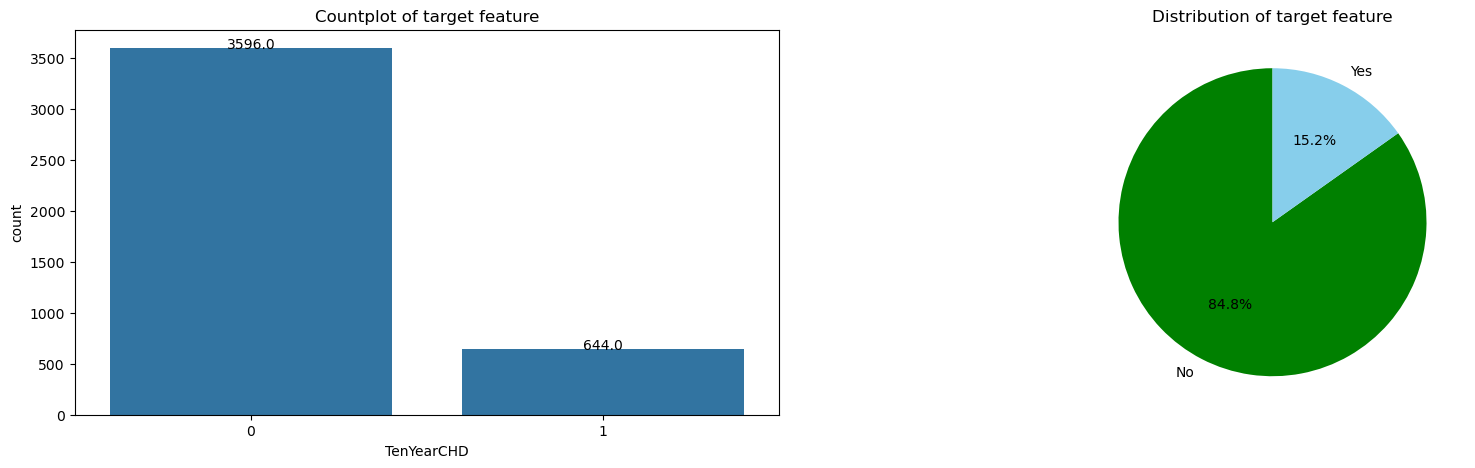

In [13]:
plt.figure(figsize = (20, 5))

# sublplot 1 
plt.subplot(1, 2, 1)
ax = sns.countplot(data = df, x = 'TenYearCHD')
plt.title('Countplot of target feature')
# Annotate the bars with the counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    
# subplot 2
plt.subplot(1, 2, 2)
labels = ['No', 'Yes']
plt.pie(df['TenYearCHD'].value_counts(), labels= labels, autopct='%1.1f%%', startangle=90, colors = ['green', 'skyblue'])
plt.title('Distribution of target feature')

plt.show()

Feature 1: male (sex of the patient)

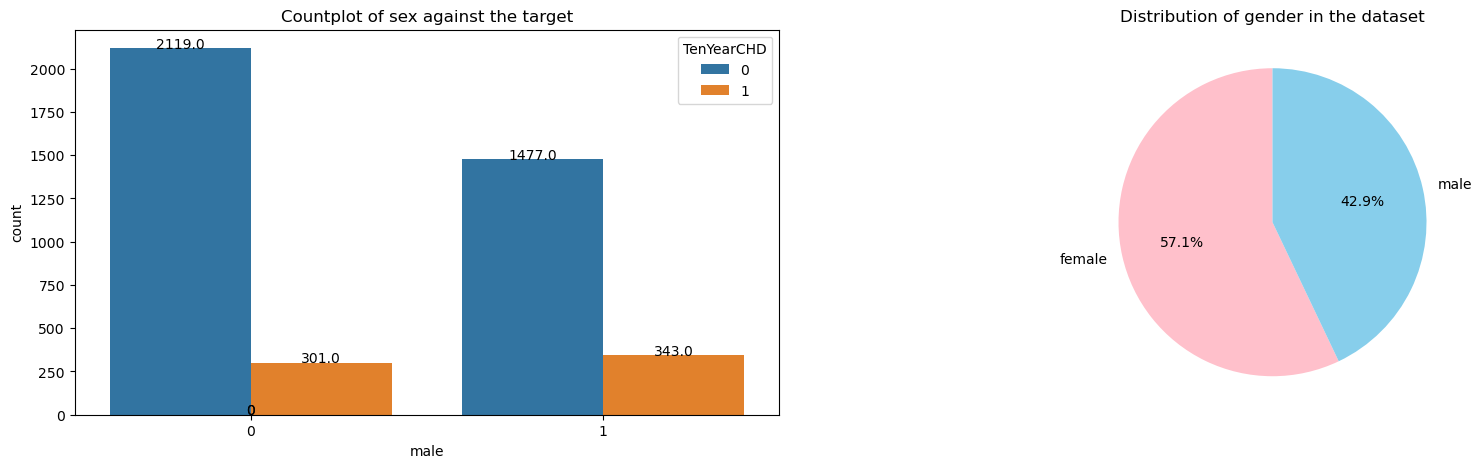

In [14]:
plt.figure(figsize = (20, 5))

# sublplot 1 
plt.subplot(1, 2, 1)
ax = sns.countplot(data = df, x = 'male', hue = 'TenYearCHD')
plt.title('Countplot of sex against the target')
# Annotate the bars with the counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    
# subplot 2
plt.subplot(1, 2, 2)
labels = ['female', 'male']
plt.pie(df['male'].value_counts(), labels= labels, autopct='%1.1f%%', startangle=90, colors = ['pink', 'skyblue'])
plt.title('Distribution of gender in the dataset')

plt.show()

Feature 2: currentsmoker (whether or not the patient is a current smoker)

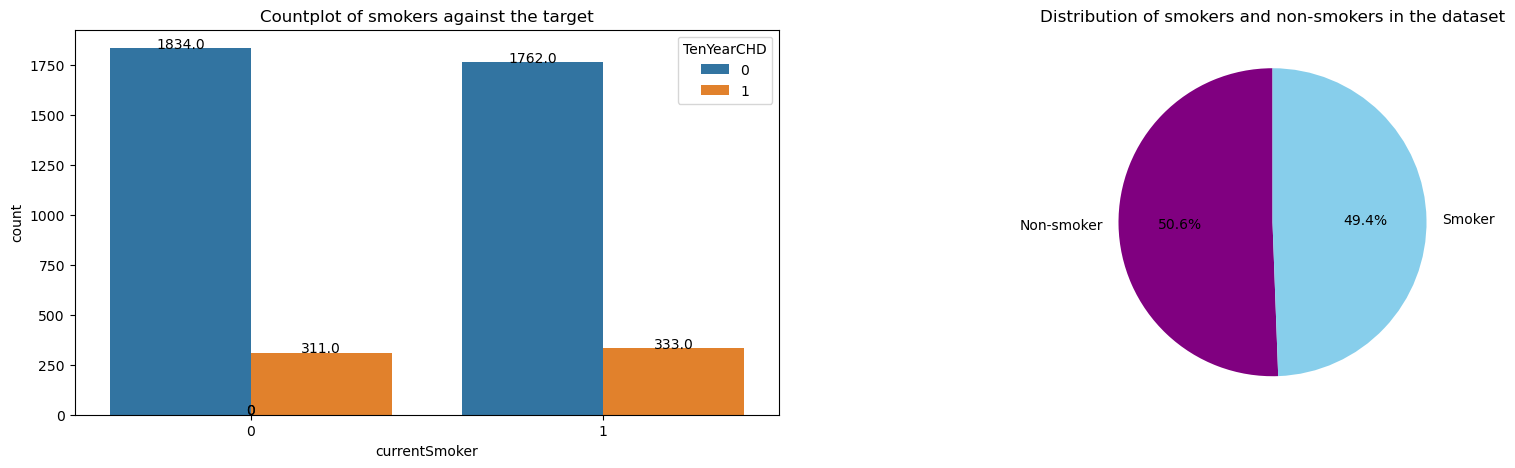

In [15]:
plt.figure(figsize = (20, 5))

# sublplot 1 
plt.subplot(1, 2, 1)
ax = sns.countplot(data = df, x = 'currentSmoker', hue = 'TenYearCHD')
plt.title('Countplot of smokers against the target')
# Annotate the bars with the counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# subplot 2
plt.subplot(1, 2, 2)
labels = ['Non-smoker', 'Smoker']
plt.pie(df['currentSmoker'].value_counts(), labels= labels, autopct='%1.1f%%', startangle=90, colors = ['purple', 'skyblue'])
plt.title('Distribution of smokers and non-smokers in the dataset')

plt.show()

Feature 3: prevalentStroke (whether or not the patient had previously had a stroke)

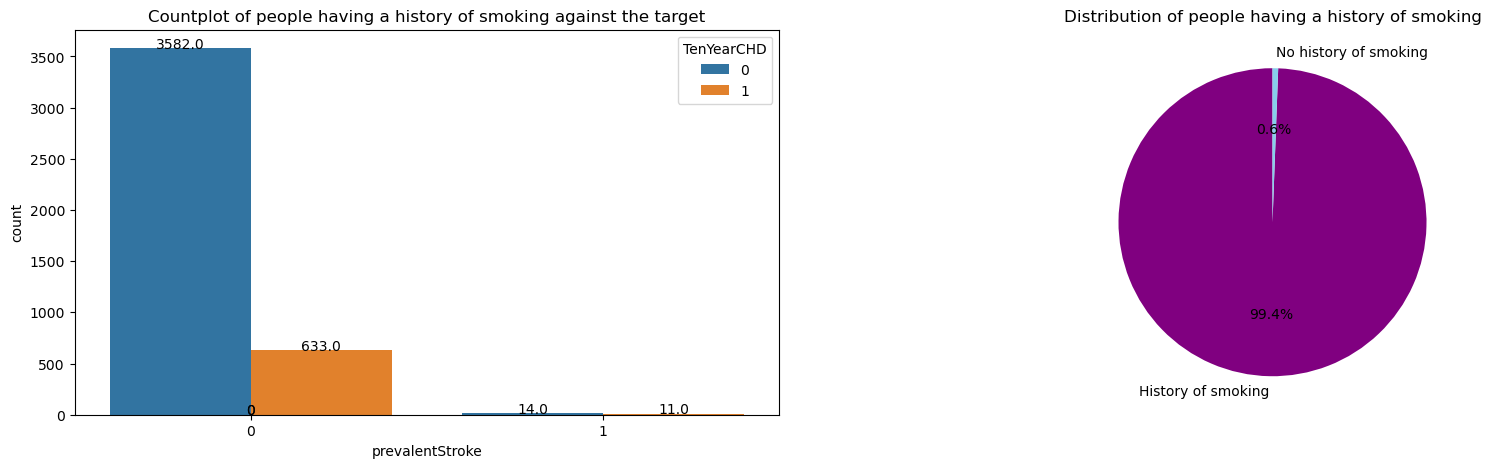

In [16]:
plt.figure(figsize = (20, 5))

# sublplot 1 
plt.subplot(1, 2, 1)
ax = sns.countplot(data = df, x = 'prevalentStroke', hue = 'TenYearCHD')
plt.title('Countplot of people having a history of smoking against the target')
# Annotate the bars with the counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# subplot 2
plt.subplot(1, 2, 2)
labels = ['History of smoking', 'No history of smoking']
plt.pie(df['prevalentStroke'].value_counts(), labels= labels, autopct='%1.1f%%', startangle=90, colors = ['purple', 'skyblue'])
plt.title('Distribution of people having a history of smoking')

plt.show()

Feature 4: prevalentHyp (whether or not the patient was hypertensive)

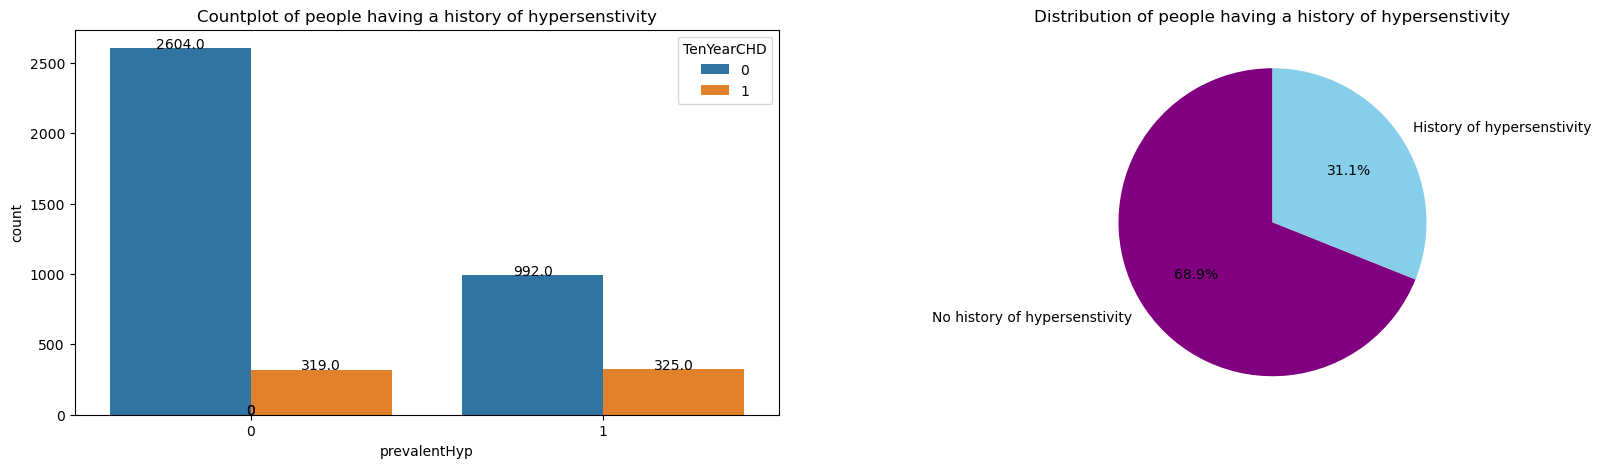

In [17]:
plt.figure(figsize = (20, 5))

# sublplot 1 
plt.subplot(1, 2, 1)
ax = sns.countplot(data = df, x = 'prevalentHyp', hue = 'TenYearCHD')
plt.title('Countplot of people having a history of hypersenstivity')
# Annotate the bars with the counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# subplot 2
plt.subplot(1, 2, 2)
labels = ['No history of hypersenstivity', 'History of hypersenstivity']
plt.pie(df['prevalentHyp'].value_counts(), labels= labels, autopct='%1.1f%%', startangle=90, colors = ['purple', 'skyblue'])
plt.title('Distribution of people having a history of hypersenstivity')

plt.show()

Feature 5: diabetes (whether or not patient had diabetes)

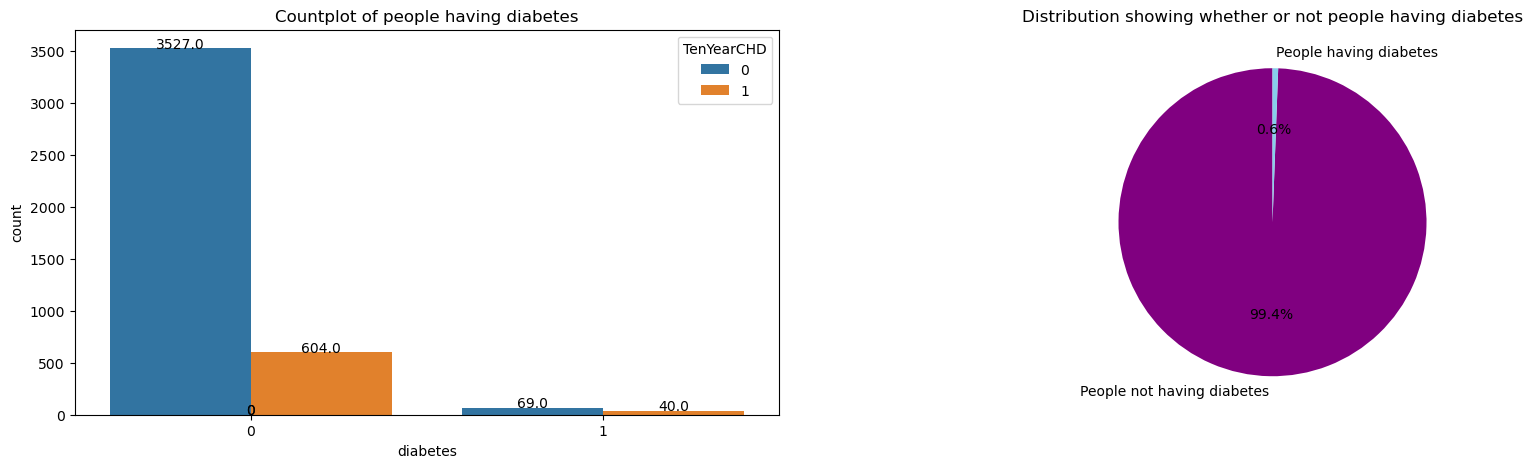

In [18]:
plt.figure(figsize = (20, 5))

# sublplot 1 
plt.subplot(1, 2, 1)
ax = sns.countplot(data = df, x = 'diabetes', hue = 'TenYearCHD')
plt.title('Countplot of people having diabetes')
# Annotate the bars with the counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# subplot 2
plt.subplot(1, 2, 2)
labels = ['People not having diabetes', 'People having diabetes']
plt.pie(df['prevalentStroke'].value_counts(), labels= labels, autopct='%1.1f%%', startangle=90, colors = ['purple', 'skyblue'])
plt.title('Distribution showing whether or not people having diabetes')

plt.show()

Feature 6: BPMeds (whether or not the patient was on blood pressure medication)

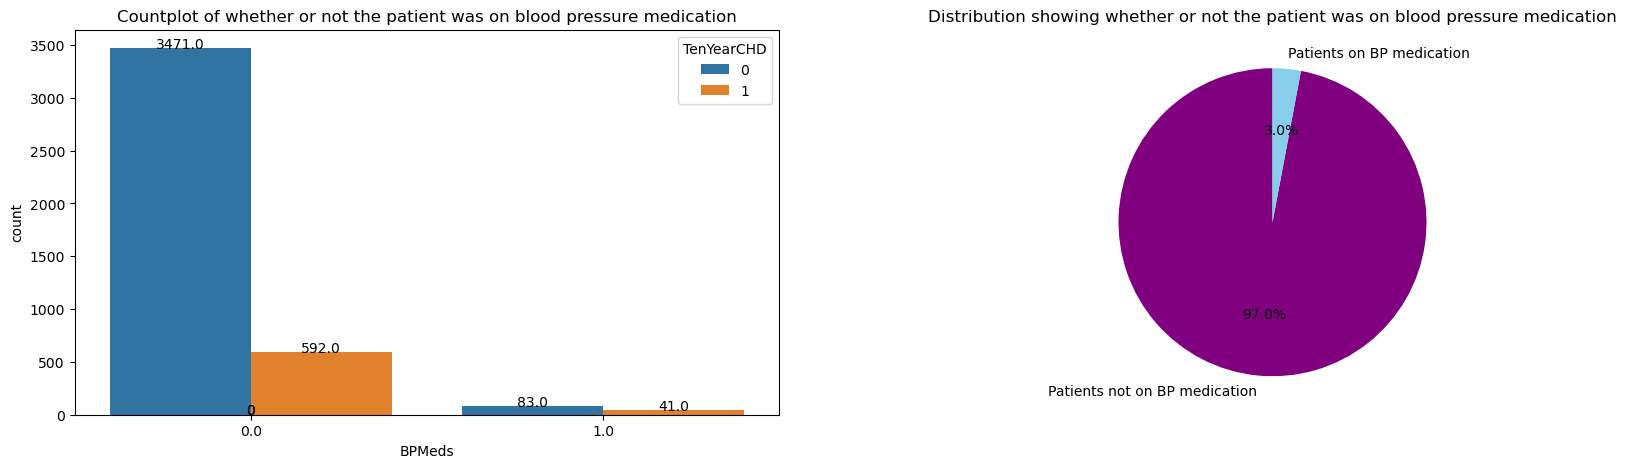

In [19]:
plt.figure(figsize = (20, 5))

# sublplot 1 
plt.subplot(1, 2, 1)
ax = sns.countplot(data = df, x = 'BPMeds', hue = 'TenYearCHD')
plt.title('Countplot of whether or not the patient was on blood pressure medication')
# Annotate the bars with the counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# subplot 2
plt.subplot(1, 2, 2)
labels = ['Patients not on BP medication', 'Patients on BP medication']
plt.pie(df['BPMeds'].value_counts(), labels= labels, autopct='%1.1f%%', startangle=90, colors = ['purple', 'skyblue'])
plt.title('Distribution showing whether or not the patient was on blood pressure medication')

plt.show()

Feature Engineering for BPMeds Feature

In [20]:
# Checking the number of missing values in the feature
print('Number of missing values in the feature: ', df['BPMeds'].isna().sum())

Number of missing values in the feature:  53


In [21]:
# Imputing the feature using the mode (since there is a dominant category)
df_new['BPMeds'] = df_new['BPMeds'].fillna(df_new['BPMeds'].mode()[0])

In [22]:
# Rechecking the number of missing values in the feature
print('Number of missing values in the feature: ', df_new['BPMeds'].isna().sum())

Number of missing values in the feature:  0


<h4>Numerical Features

Feature 7: age (Age of the patient)

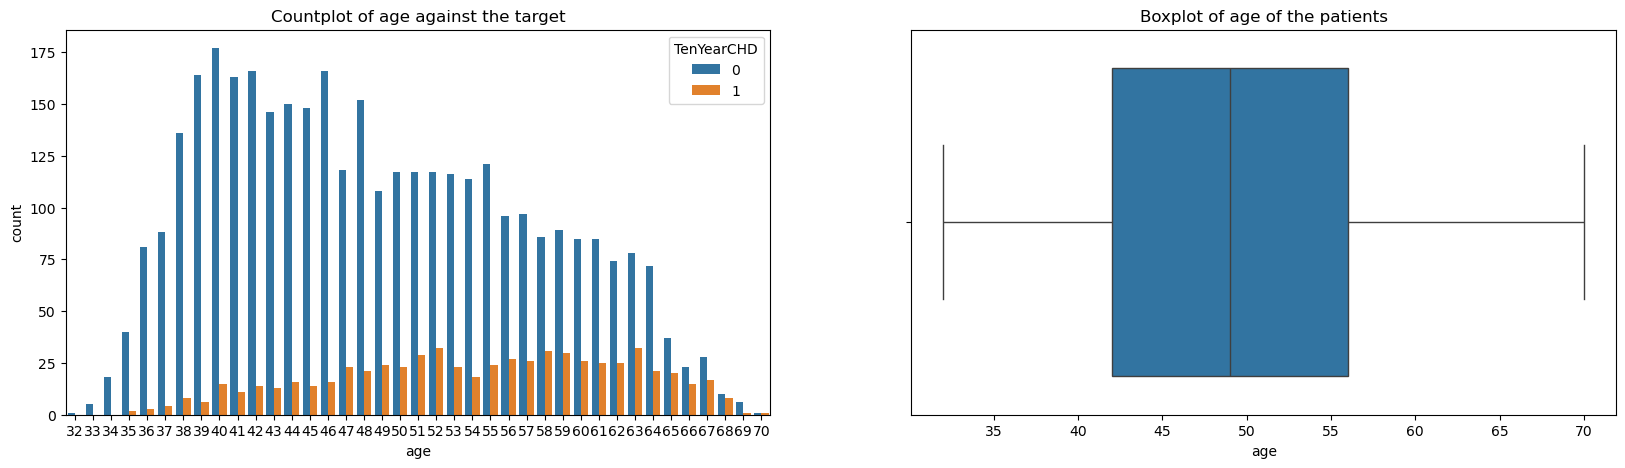

In [23]:
plt.figure(figsize = (20,5))

# subplot 1
plt.subplot(1, 2, 1)
sns.countplot(data = df, x = 'age', hue = 'TenYearCHD')
plt.title('Countplot of age against the target')

# subplot 2
plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'age')
plt.title('Boxplot of age of the patients')

plt.show()

Note: We will not be doing any transformation with respect to age feature because we would want to keep all the information as it is

Feature 8: education (No further information was provided)

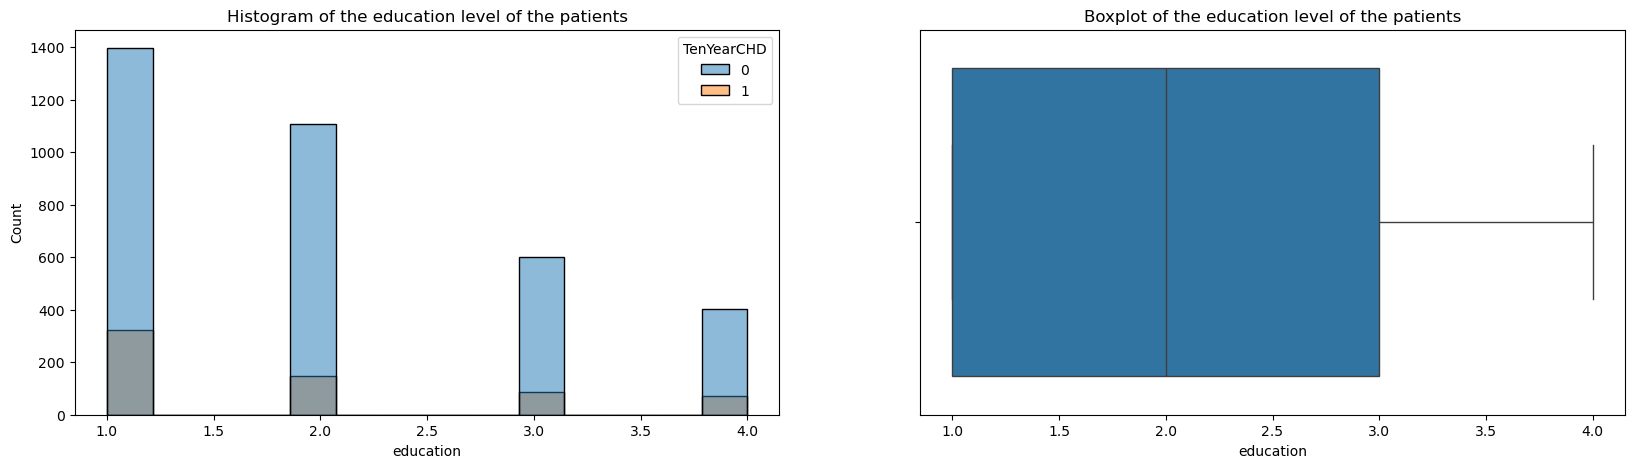

In [24]:
plt.figure(figsize = (20, 5))

# subplot 1
plt.subplot(1, 2 ,1)
sns.histplot(data =df, x = 'education', hue = 'TenYearCHD')
plt.title('Histogram of the education level of the patients')

# subplot 2 
plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'education')
plt.title('Boxplot of the education level of the patients')

plt.show()

Feature Engineering for the education feature

In [25]:
# Checking the number of missing values in the feature
print('Number of missing values in the feature:', df['education'].isna().sum())

Number of missing values in the feature: 105


In [26]:
# Imputing the feature with median (since the distribution is skewed)
df_new['education'] = df_new['education'].fillna(df_new['education'].median())

In [27]:
# Rechecking the number of missing values in the feature
print('Number of missing values in the feature: ', df_new['education'].isna().sum())

Number of missing values in the feature:  0


Feature 9: cigsPerDay (The number of cigrettes that a person smoked on an average in one day)

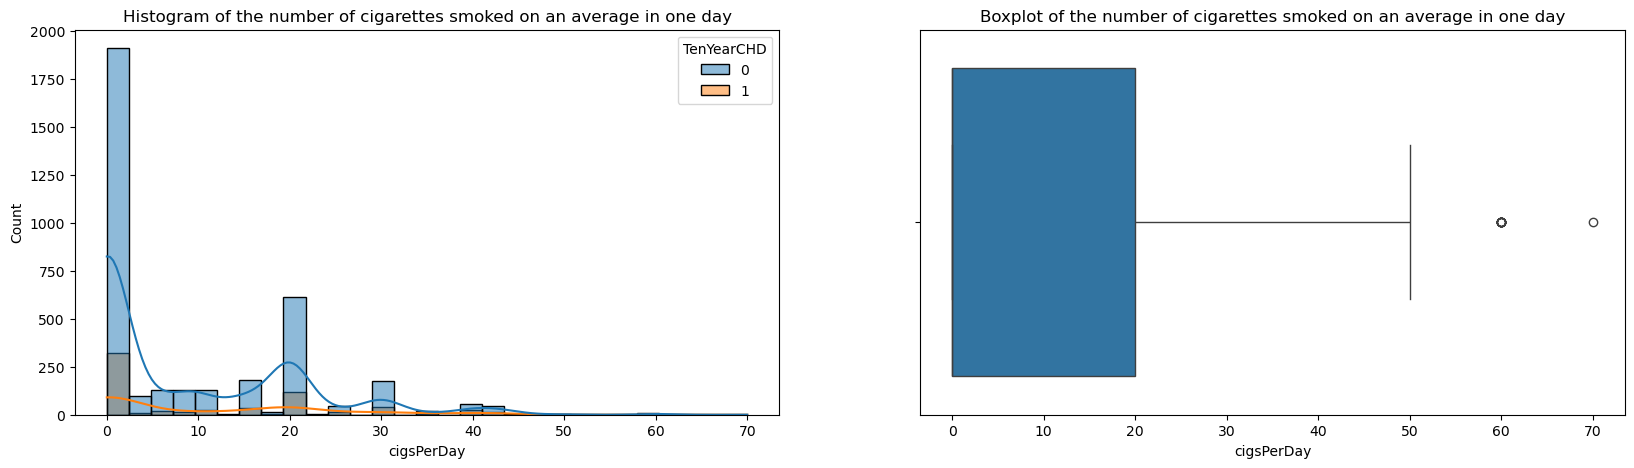

In [28]:
plt.figure(figsize = (20, 5))

# subplot 1
plt.subplot(1, 2 ,1)
sns.histplot(data =df, x = 'cigsPerDay', hue = 'TenYearCHD', kde = True)
plt.title('Histogram of the number of cigarettes smoked on an average in one day')

# subplot 2 
plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'cigsPerDay')
plt.title('Boxplot of the number of cigarettes smoked on an average in one day')

plt.show()

Feature Engineering for cigsPerDay feature

In [29]:
# Checking the number of missing values in the feature
print('Number of missing values in the feature: ', df['cigsPerDay'].isna().sum())

Number of missing values in the feature:  29


In [30]:
# Imputing the feature using the median (since the distribution is skewed, the mean will be affected by the outliers)
df_new['cigsPerDay'] = df_new['cigsPerDay'].fillna(df_new['cigsPerDay'].median())

In [31]:
# Rechecing the number of missing values in the feature
print('Number of missing values in the feature: ', df_new['cigsPerDay'].isna().sum())

Number of missing values in the feature:  0


We will not be applying any transformation and standarization on this feature because it's distribution is unconventional and would like to keep the useful information

Feature 10: totChol (total cholestrol level)

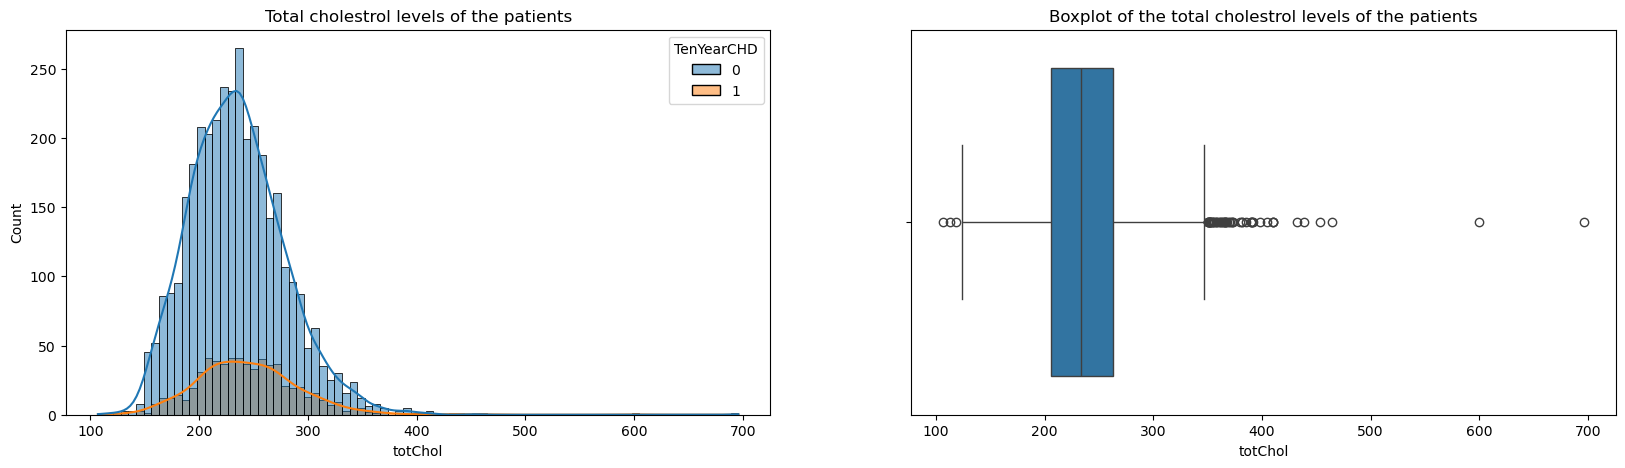

In [32]:
plt.figure(figsize = (20, 5))

# subplot 1 
plt.subplot(1, 2, 1)
sns.histplot(data =df, x = 'totChol', hue = 'TenYearCHD', kde = True)
plt.title('Total cholestrol levels of the patients')

# subplot 2 
plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'totChol')
plt.title('Boxplot of the total cholestrol levels of the patients')

plt.show()

Feature Engineering for totChol feature

In [33]:
# Checking the number and percentage of missing values in the feature
print('Number of missing values in the feature: ', (df['totChol'].isna().sum()))
print('Percentage of missing values for feature "totChol": ', (df['totChol'].isna().sum())/(df.shape[0])*100)

Number of missing values in the feature:  50
Percentage of missing values for feature "totChol":  1.179245283018868


In [34]:
# Imputing the missing value with the median (since the feature is right-skewed)
df_new['totChol'] = df['totChol'].fillna(df_new['totChol'].median())
print('Number of missing values after imputation: ', df_new['totChol'].isna().sum())

Number of missing values after imputation:  0


In [35]:
# Checking the number of outliers in the feature
# Checking the outliers using the IQR method
Q1 = df_new['totChol'].quantile(0.25)
Q3 = df_new['totChol'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Finding out the number of outliers
outliers_totChol = df_new[(df_new['totChol'] > upper_bound) | (df_new['totChol'] < lower_bound)]
print('Number of outliers before capping: ', len(outliers_totChol))

Number of outliers before capping:  57


In [36]:
# Capping the outliers
df_new['totChol'] = np.where(df_new['totChol'] > upper_bound, upper_bound, df_new['totChol'])
df_new['totChol'] = np.where(df_new['totChol'] < lower_bound, lower_bound, df_new['totChol'])

print('Number of outliers after capping: ', len(df_new[(df_new['totChol'] > upper_bound) | (df_new['totChol'] < lower_bound)]))

Number of outliers after capping:  0


In [37]:
# Tranforming the feature to a normal distribution using the log transformation
df_new['totChol'] = np.log(df_new['totChol'])

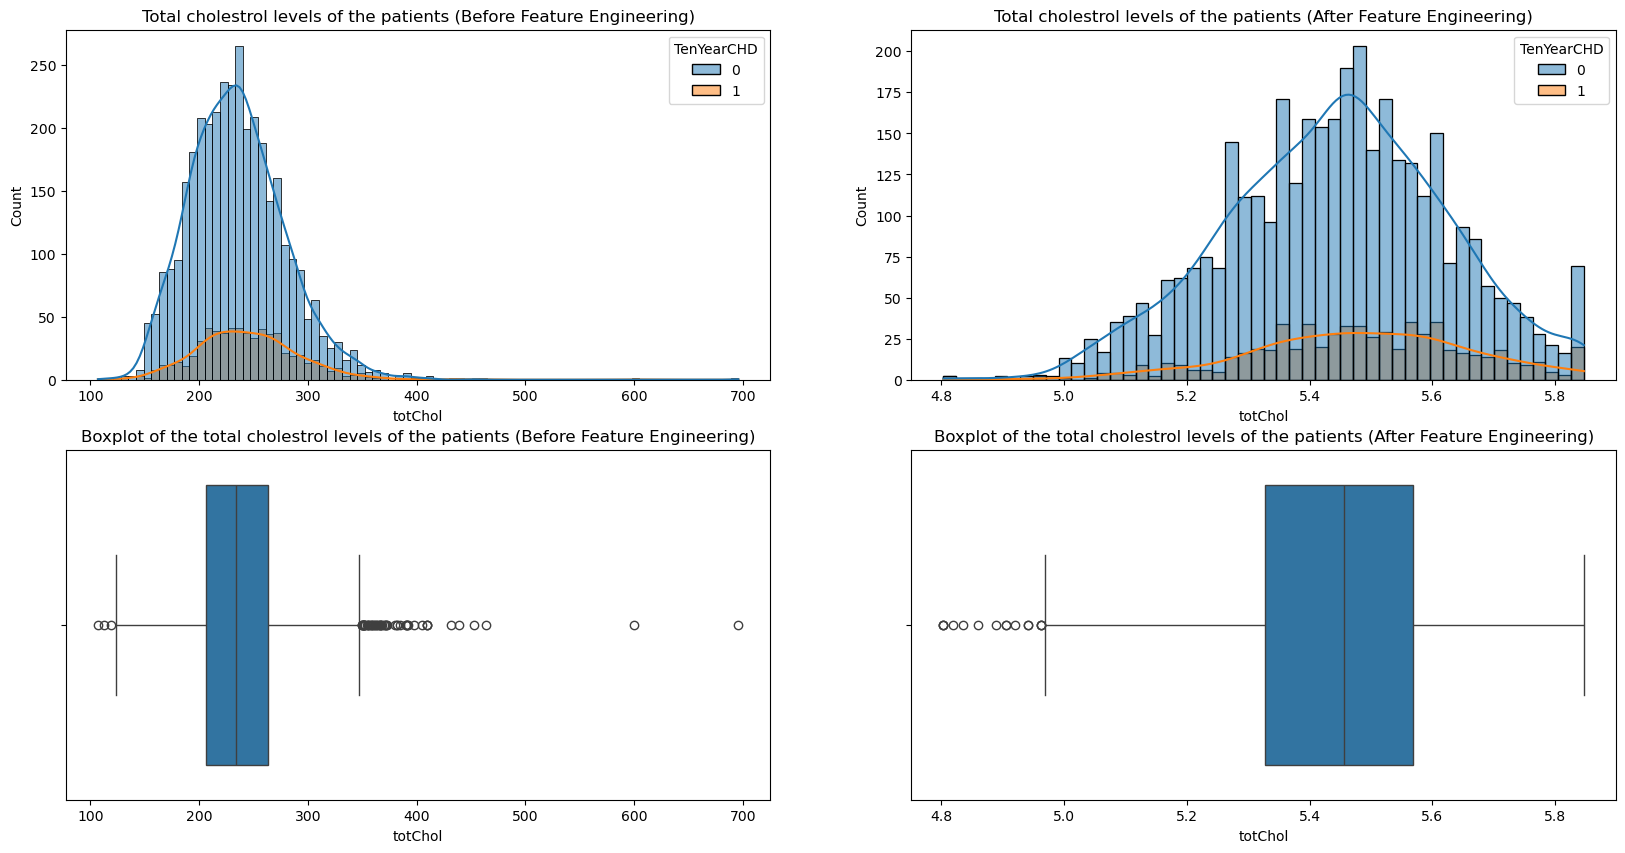

In [38]:
# Rechecking the distribution of the feature
plt.figure(figsize = (20, 10))

# subplot 1 
plt.subplot(2, 2, 1)
sns.histplot(data =df, x = 'totChol', hue = 'TenYearCHD', kde = True)
plt.title('Total cholestrol levels of the patients (Before Feature Engineering)')

# subplot 2 
plt.subplot(2, 2, 2)
sns.histplot(data =df_new, x = 'totChol', hue = 'TenYearCHD', kde = True, bins = 50)
plt.title('Total cholestrol levels of the patients (After Feature Engineering)')

# subplot 3
plt.subplot(2, 2, 3)
sns.boxplot(data = df, x = 'totChol')
plt.title('Boxplot of the total cholestrol levels of the patients (Before Feature Engineering)')

# subplot 4
plt.subplot(2, 2, 4)
sns.boxplot(data = df_new, x = 'totChol')
plt.title('Boxplot of the total cholestrol levels of the patients (After Feature Engineering)')

plt.show()

Feature 11: sysBP (systolic blood pressure)
Feature 12: diaBP (diastolic blood pressure)

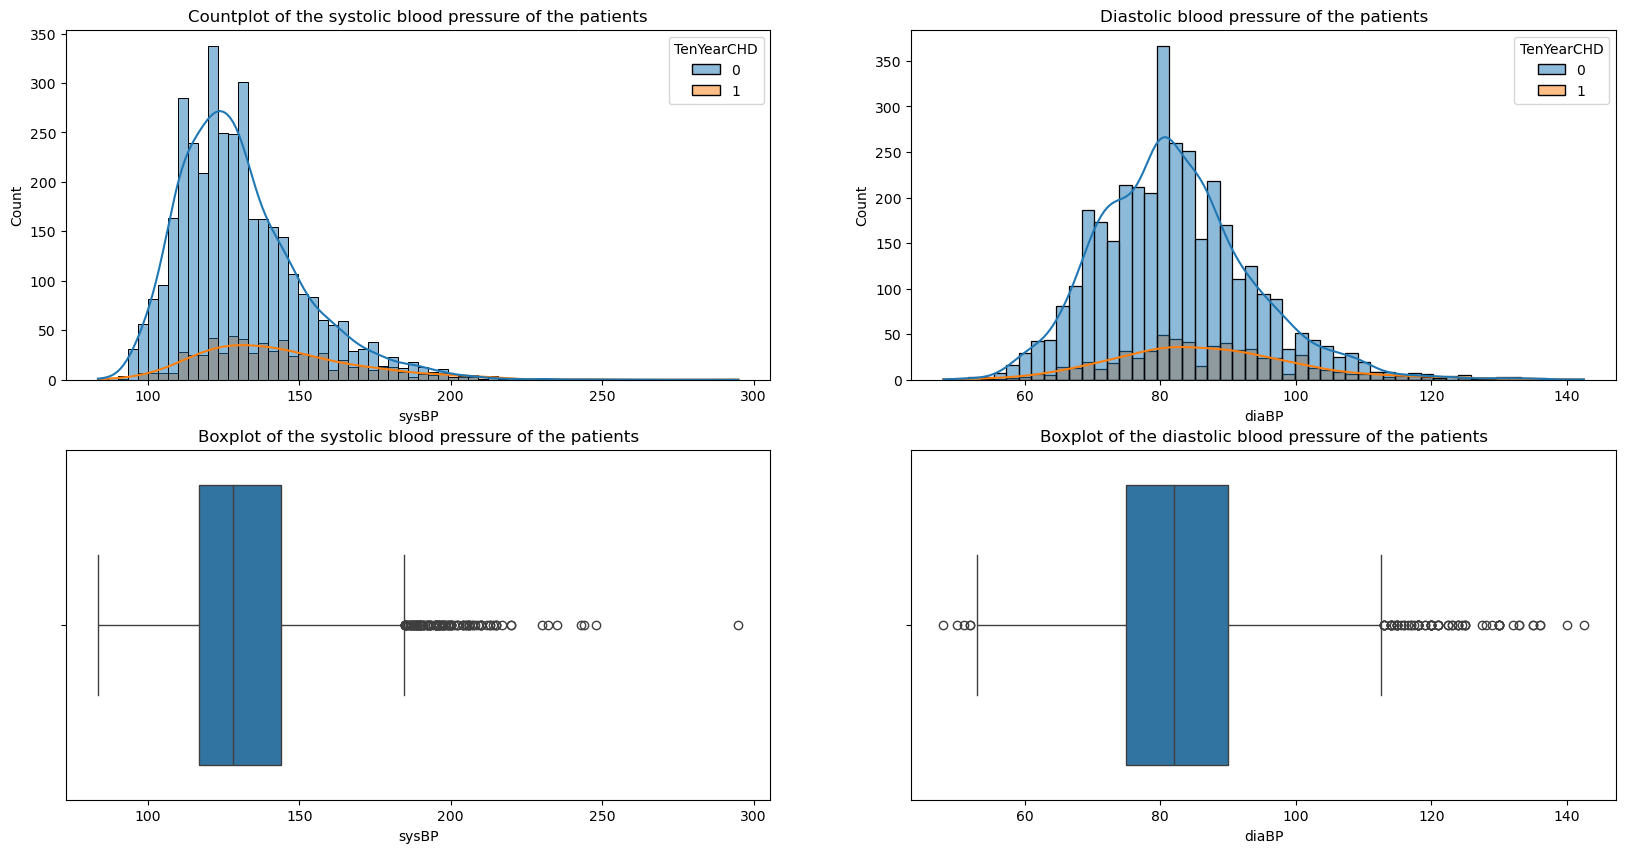

In [39]:
plt.figure(figsize = (20, 10))

# subplot 1
plt.subplot(2, 2, 1)
sns.histplot(data = df, x = 'sysBP', hue = 'TenYearCHD', kde = True)
plt.title('Countplot of the systolic blood pressure of the patients')

# subplot 2 
plt.subplot(2, 2, 2)
sns.histplot(data = df, x = 'diaBP', hue = 'TenYearCHD', kde = True)
plt.title('Diastolic blood pressure of the patients')

# subplot 3
plt.subplot(2, 2, 3)
sns.boxplot(data = df, x = 'sysBP')
plt.title('Boxplot of the systolic blood pressure of the patients')

# subplot 4
plt.subplot(2, 2, 4)
sns.boxplot(data = df, x = 'diaBP')
plt.title('Boxplot of the diastolic blood pressure of the patients')

plt.show()

Feature Engineering for the features, sysBP and diaBP

In [40]:
# Checking the number of outliers in the features

# For sysBP
Q1 = df_new['sysBP'].quantile(0.25)
Q3 = df_new['sysBP'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Finding out the number of outliers
outliers_sysBP = df_new[(df_new['sysBP'] > upper_bound) | (df_new['sysBP'] < lower_bound)]
print('Number of outliers in the feature "sysBP" before capping: ', len(outliers_sysBP))

# Capping the outliers
df_new['sysBP'] = np.where(df_new['sysBP'] > upper_bound, upper_bound, df_new['sysBP'])
df_new['sysBP'] = np.where(df_new['sysBP'] < lower_bound, lower_bound, df_new['sysBP'])

outliers_sysBP = df_new[(df_new['sysBP'] > upper_bound) | (df_new['sysBP'] < lower_bound)]
print('Number of outliers in the feature "sysBP" after capping: ', len(outliers_sysBP))
# For diaBP
Q1 = df_new['diaBP'].quantile(0.25)
Q3 = df_new['diaBP'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Finding out the number of outliers
outliers_diaBP = df_new[(df_new['diaBP'] > upper_bound) | (df_new['diaBP'] < lower_bound)]
print('Number of outliers in the feature "diaBP" before capping: ', len(outliers_diaBP))

Number of outliers in the feature "sysBP" before capping:  126
Number of outliers in the feature "sysBP" after capping:  0
Number of outliers in the feature "diaBP" before capping:  77


In [41]:
# Capping the outliers
df_new['diaBP'] = np.where(df_new['diaBP'] > upper_bound, upper_bound, df_new['diaBP'])
df_new['diaBP'] = np.where(df_new['diaBP'] < lower_bound, lower_bound, df_new['diaBP'])

outliers_diaBP = df_new[(df_new['diaBP'] > upper_bound) | (df_new['diaBP'] < lower_bound)]
print('Number of outliers in the feature "diaBP" after capping: ', len(outliers_diaBP))

# Rechecking the shape of the features

Number of outliers in the feature "diaBP" after capping:  0


In [42]:
# Applying log transformation to the features to make them normally distributed
df_new['sysBP'] = np.log(df_new['sysBP'])
df_new['diaBP'] = np.log(df_new['diaBP'])

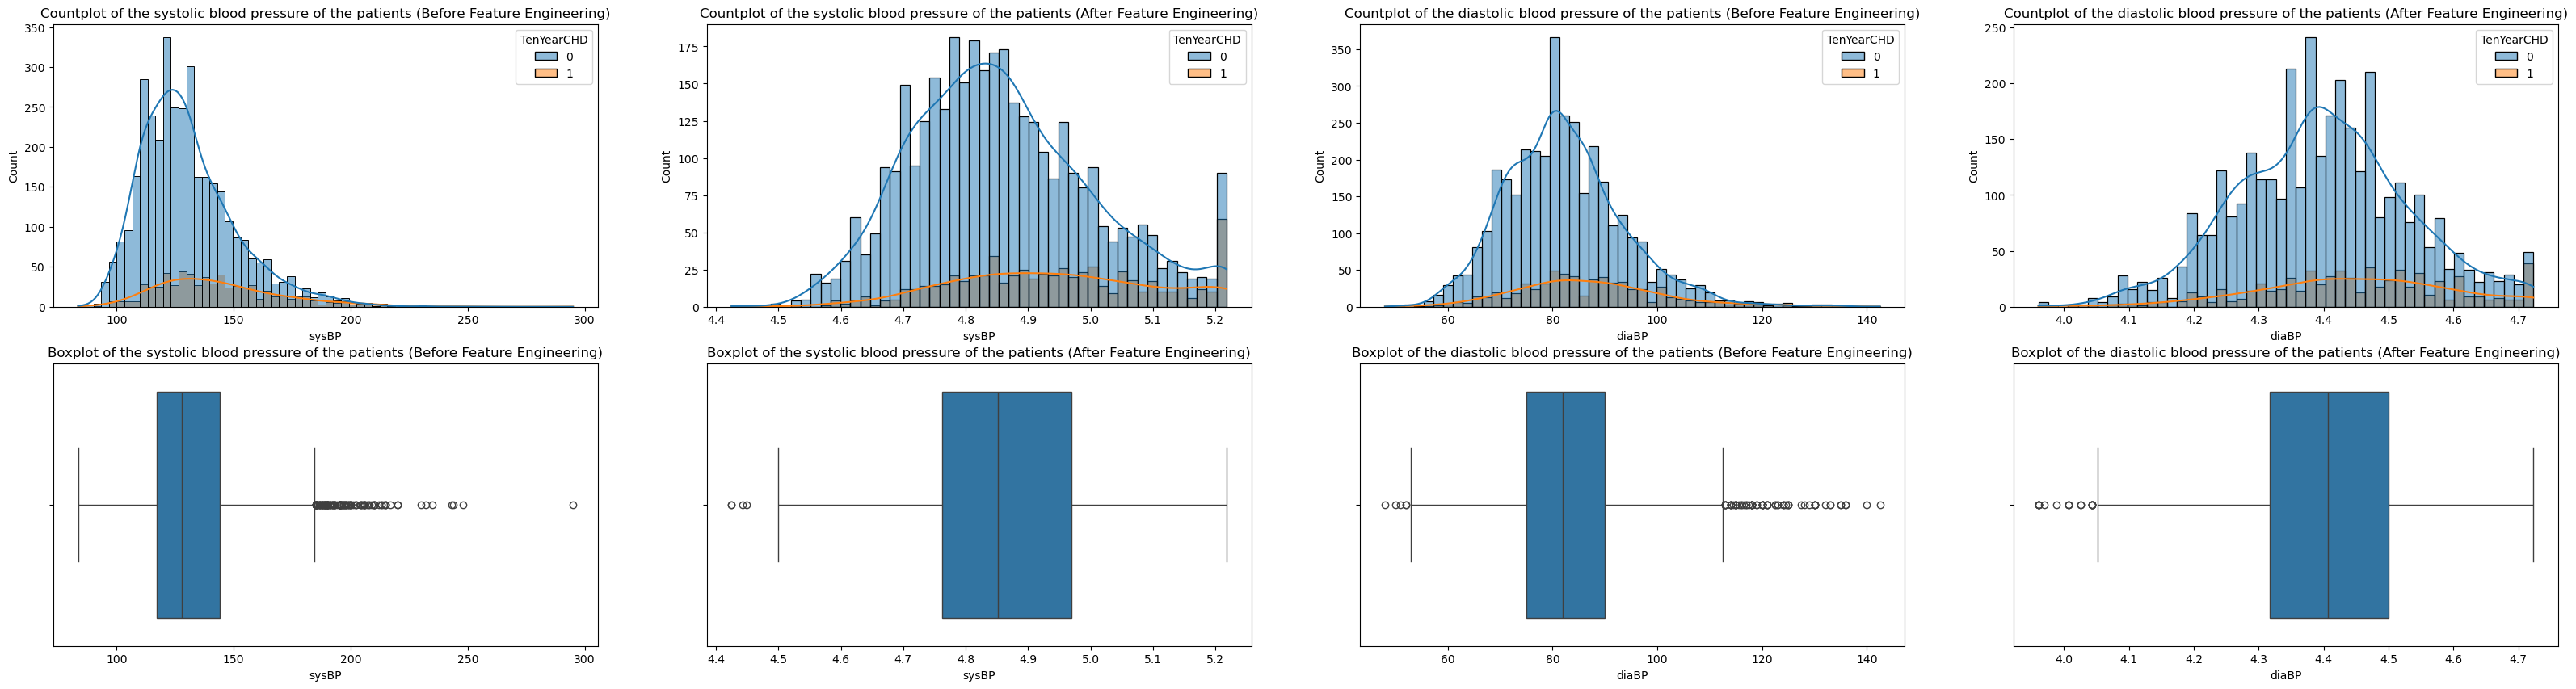

In [43]:
plt.figure(figsize = (40, 10))

# subplot 1
plt.subplot(2, 4, 1)
sns.histplot(data = df, x = 'sysBP', hue = 'TenYearCHD', kde = True)
plt.title('Countplot of the systolic blood pressure of the patients (Before Feature Engineering)')

# subplot 2
plt.subplot(2, 4, 2)
sns.histplot(data = df_new, x = 'sysBP', hue = 'TenYearCHD', kde = True, bins = 50)
plt.title('Countplot of the systolic blood pressure of the patients (After Feature Engineering)')

# subplot 3
plt.subplot(2, 4, 3)
sns.histplot(data = df, x = 'diaBP', hue = 'TenYearCHD', kde = True)
plt.title('Countplot of the diastolic blood pressure of the patients (Before Feature Engineering)')

# subplot 4
plt.subplot(2, 4, 4)
sns.histplot(data = df_new, x = 'diaBP', hue = 'TenYearCHD', kde = True, bins = 50)
plt.title('Countplot of the diastolic blood pressure of the patients (After Feature Engineering)')

# subplot 5
plt.subplot(2, 4, 5)
sns.boxplot(data = df, x = 'sysBP')
plt.title('Boxplot of the systolic blood pressure of the patients (Before Feature Engineering)')

# subplot 6
plt.subplot(2, 4, 6)
sns.boxplot(data = df_new, x = 'sysBP')
plt.title('Boxplot of the systolic blood pressure of the patients (After Feature Engineering)')

# subplot 7
plt.subplot(2, 4, 7)
sns.boxplot(data = df, x = 'diaBP')
plt.title('Boxplot of the diastolic blood pressure of the patients (Before Feature Engineering)')

# subplot 8
plt.subplot(2, 4, 8)
sns.boxplot(data = df_new, x = 'diaBP')
plt.title('Boxplot of the diastolic blood pressure of the patients (After Feature Engineering)')

plt.show()

Feature 13: BMI (Body Mass Index of the patients)

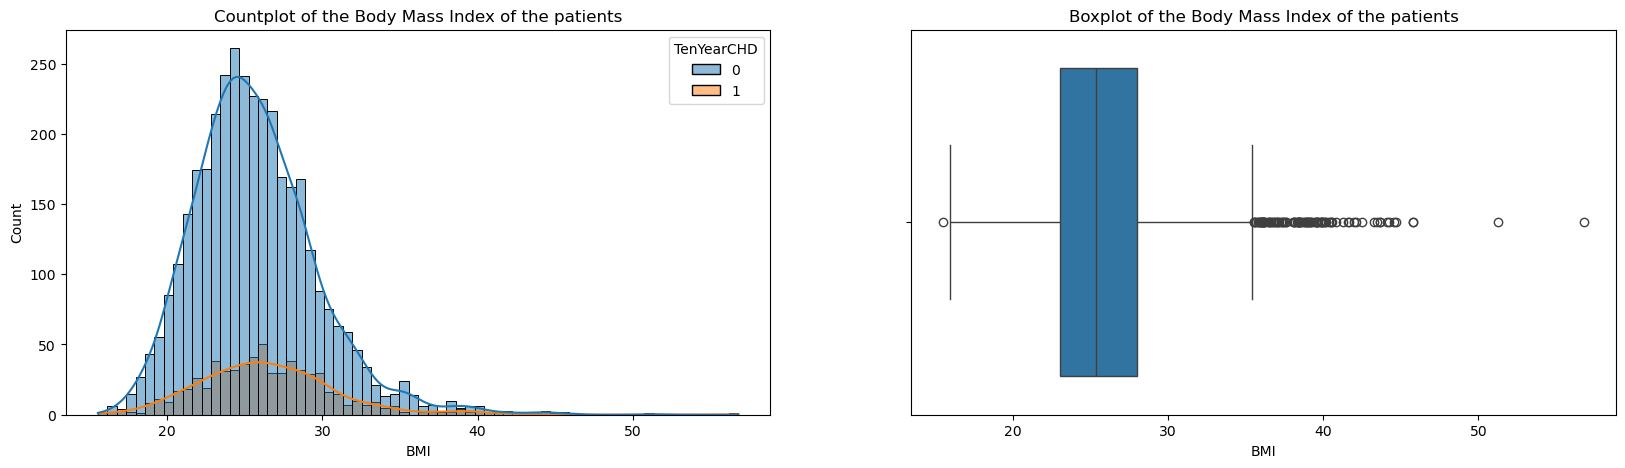

In [44]:
plt.figure(figsize = (20, 5))

# subplot 1 
plt.subplot(1, 2, 1)
sns.histplot(data =df, x = 'BMI', hue = 'TenYearCHD', kde = True)
plt.title('Countplot of the Body Mass Index of the patients')

# subplot 2 
plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'BMI')
plt.title('Boxplot of the Body Mass Index of the patients')

plt.show()

Feature Engineering for BMI feature

In [45]:
# Checking the number and the percentage of missing values in the feature
print('Number of missing values in the feature: ', df['BMI'].isna().sum())
print('Percentage of missing values for feature "BMI": ', (df['BMI'].isna().sum())/(df.shape[0])*100)

Number of missing values in the feature:  19
Percentage of missing values for feature "BMI":  0.4481132075471698


In [46]:
# Imputing the missing value with the median (since the feature is right-skewed)
df_new['BMI'] = df['BMI'].fillna(df['BMI'].mean())
print('The number of missing values after imputation: ', df_new['BMI'].isna().sum())

The number of missing values after imputation:  0


In [47]:
# Checking the number of outliers in the feature
# Capping the outliers using the IQR method
Q1 = df_new['BMI'].quantile(0.25)
Q3 = df_new['BMI'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Finding out the number of outliers
outliers_bmi = df_new[(df_new['BMI'] > upper_bound) | (df_new['BMI'] < lower_bound)]
print('Number of outliers before capping: ', len(outliers_bmi))

# Capping the outliers 
df_new['BMI'] = np.where(df_new['BMI'] > upper_bound, upper_bound, df_new['BMI'])
df_new['BMI'] = np.where(df_new['BMI'] < lower_bound, lower_bound, df_new['BMI'])

outliers_bmi = df_new[(df_new['BMI'] > upper_bound) | (df_new['BMI'] < lower_bound)]
print('Number of outliers after capping: ', len(outliers_bmi))

Number of outliers before capping:  97
Number of outliers after capping:  0


In [48]:
# Applying log transformation to the feature to amke it normally distributed
df_new['BMI'] = np.log(df_new['BMI'])

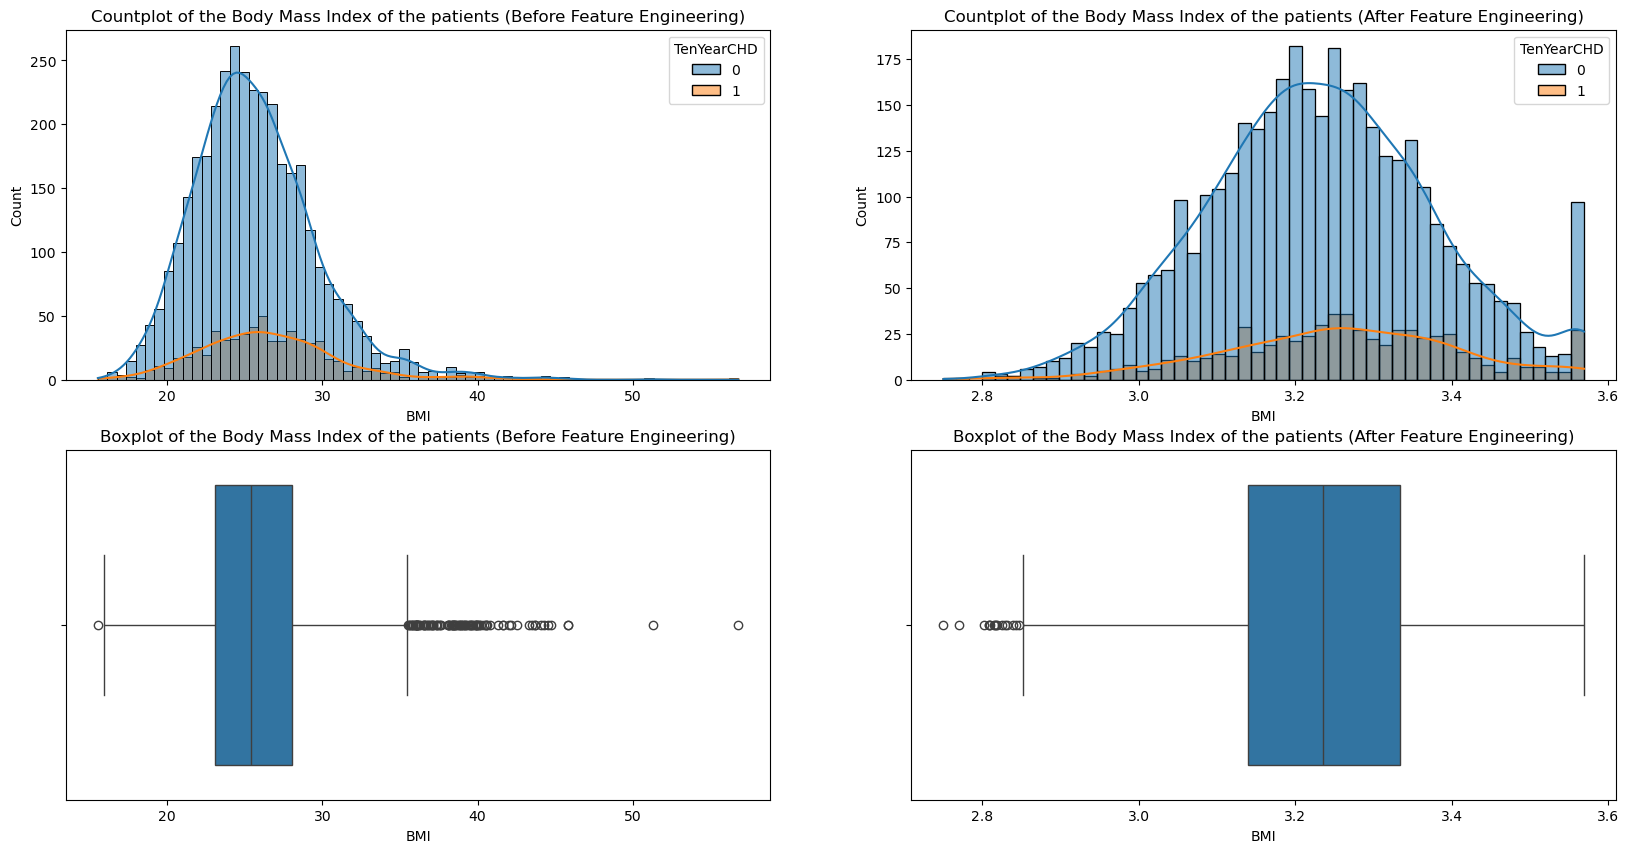

In [49]:
# Rechecking the distribution of the feature
plt.figure(figsize = (20, 10))

# subplot 1 
plt.subplot(2, 2, 1)
sns.histplot(data =df, x = 'BMI', hue = 'TenYearCHD', kde = True)
plt.title('Countplot of the Body Mass Index of the patients (Before Feature Engineering)')

# subplot 2 
plt.subplot(2, 2, 2)
sns.histplot(data =df_new, x = 'BMI', hue = 'TenYearCHD', kde = True, bins = 50)
plt.title('Countplot of the Body Mass Index of the patients (After Feature Engineering)')

# subplot 3
plt.subplot(2, 2, 3)
sns.boxplot(data = df, x = 'BMI')
plt.title('Boxplot of the Body Mass Index of the patients (Before Feature Engineering)')

# subplot 4
plt.subplot(2, 2, 4)
sns.boxplot(data = df_new, x = 'BMI')
plt.title('Boxplot of the Body Mass Index of the patients (After Feature Engineering)')

plt.show()

Feature 14:heartRate (heart rate (In medical research, variables such as heart rate though in fact discrete, are considered continuous because of a large number of possible values.))

In [50]:
plt.figure(figsize = (20, 5))

# subplot 1 
plt.subplot(1, 2, 1)
sns.histplot(data =df, x = 'heartRate', hue = 'TenYearCHD', kde = True)
plt.title('Countplot of the heartRate of the patients')

# subplot 2 
plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'heartRate')
plt.title('Boxplot of the heartRate of the patients')

plt.show()

Feature Engineering for heartRate feature

In [51]:
# Checking the number and percentage missing values in the feature
print('Total number of missing values: ', df['heartRate'].isna().sum())
print('Percentage of missing values for feature "heartRate": ', (df['heartRate'].isna().sum())/(df.shape[0])*100)

Total number of missing values:  1
Percentage of missing values for feature "heartRate":  0.02358490566037736


In [52]:
# Imputing the missing value with the mean (since there aren't many outliers and the distribution is approximately normal)
df_new['heartRate'] = df['heartRate'].fillna(df['heartRate'].mean())
print('The number of missing values after imputation: ', df_new['heartRate'].isna().sum())

The number of missing values after imputation:  0


In [53]:
# Checking the number of outliers in the feature
# Capping the outliers using the IQR method
Q1 = df_new['heartRate'].quantile(0.25)
Q3 = df_new['heartRate'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Finding out the number of outliers
outliers_heartRate = df_new[(df_new['heartRate'] > upper_bound) | (df_new['heartRate'] < lower_bound)]
print('Number of outliers before capping: ', len(outliers_heartRate))

# Capping the outliers 
df_new['heartRate'] = np.where(df_new['heartRate'] > upper_bound, upper_bound, df_new['heartRate'])
df_new['heartRate'] = np.where(df_new['heartRate'] < lower_bound, lower_bound, df_new['heartRate'])

outliers_heartRate = df_new[(df_new['heartRate'] > upper_bound) | (df_new['heartRate'] < lower_bound)]
print('Number of outliers after capping: ', len(outliers_heartRate))

Number of outliers before capping:  76
Number of outliers after capping:  0


In [54]:
# Applying log transformation to the feature to make it normally distributed
df_new['heartRate'] = np.log(df_new['heartRate'])

In [55]:
# Rechecking the distribution of the feature
plt.figure(figsize = (20, 10))

# subplot 1 
plt.subplot(2, 2, 1)
sns.histplot(data =df, x = 'heartRate', hue = 'TenYearCHD', kde = True)
plt.title('Countplot of the heartRate of the patients (Before Feature Engineering)')

# subplot 2 
plt.subplot(2, 2, 2)
sns.histplot(data =df_new, x = 'heartRate', hue = 'TenYearCHD', kde = True, bins = 50)
plt.title('Countplot of the heartRate of the patients (After Feature Engineering)')

# subplot 3
plt.subplot(2, 2, 3)
sns.boxplot(data = df, x = 'heartRate')
plt.title('Boxplot of the heartRate of the patients (Before Feature Engineering)')

# subplot 4
plt.subplot(2, 2, 4)
sns.boxplot(data = df_new, x = 'heartRate')
plt.title('Boxplot of the heartRate of the patients (After Feature Engineering)')

plt.show()

Feature 15: glucose (glucose level of patients)

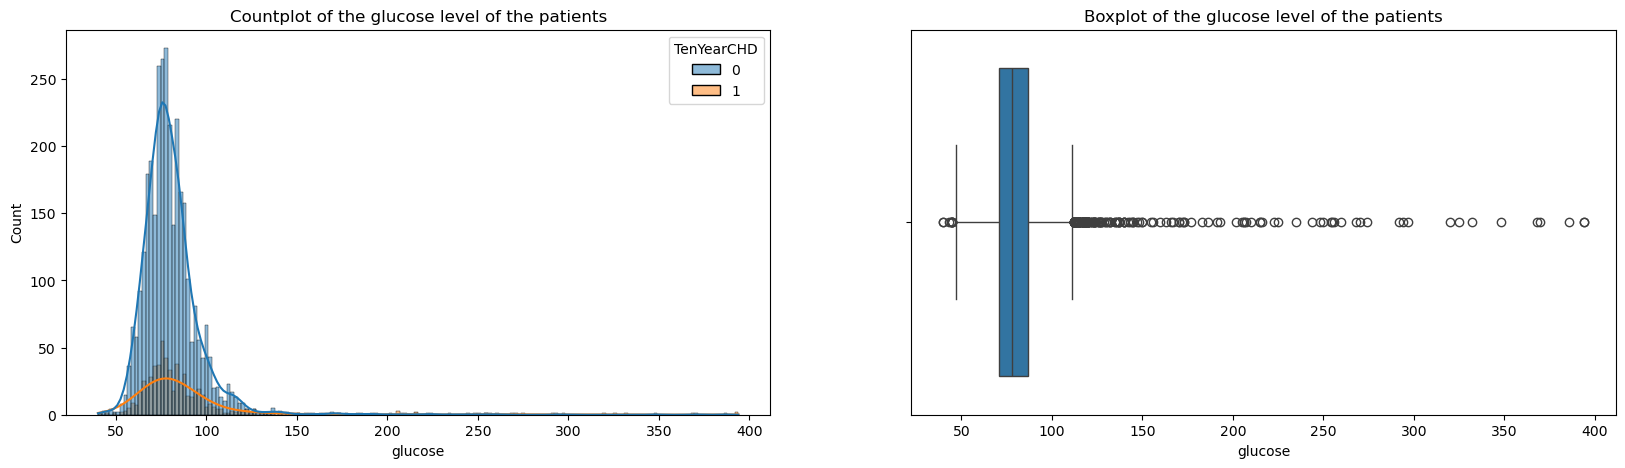

In [56]:
plt.figure(figsize = (20, 5))

# subplot 1 
plt.subplot(1, 2, 1)
sns.histplot(data =df, x = 'glucose', hue = 'TenYearCHD', kde = True)
plt.title('Countplot of the glucose level of the patients')

# subplot 2 
plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'glucose')
plt.title('Boxplot of the glucose level of the patients')

plt.show()

Feature engineering for glucose feature

In [57]:
print('Total number of missing values: ', df['glucose'].isna().sum())
print('Percentage of missing values for feature "glucose": ', (df['glucose'].isna().sum())/(df.shape[0])*100)

Total number of missing values:  388
Percentage of missing values for feature "glucose":  9.150943396226415


In [58]:
# Filling the missing values with the median since using the mean would be affected by the presence of outliers
df_new['glucose'] = df['glucose'].fillna(df['glucose'].median())
print('Total number of missing values after filling: ', df_new['glucose'].isna().sum())

Total number of missing values after filling:  0


Since the missing values have now been handled, now taking care of the outliers

In [59]:
# Capping the outliers using the IQR method
Q1 = df_new['glucose'].quantile(0.25)
Q3 = df_new['glucose'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Finding out the number of outliers
outliers_glucose = df_new[(df_new['glucose'] > upper_bound) | (df_new['glucose'] < lower_bound)]
print('Number of outliers before capping: ', len(outliers_glucose))

# Capping the outliers
df_new['glucose'] = np.where(df_new['glucose'] > upper_bound, upper_bound, df_new['glucose'])
df_new['glucose'] = np.where(df_new['glucose'] < lower_bound, lower_bound, df_new['glucose'])

outliers_glucose = df_new[(df_new['glucose'] > upper_bound) | (df_new['glucose'] < lower_bound)]
print('Number of outliers after capping: ', len(outliers_glucose))

Number of outliers before capping:  262
Number of outliers after capping:  0


In [60]:
# Transforming the feature to a normal distribution since the model to be used is a logistic regression model which assumes normality in the features
df_new['glucose'] = np.sqrt(df_new['glucose'])

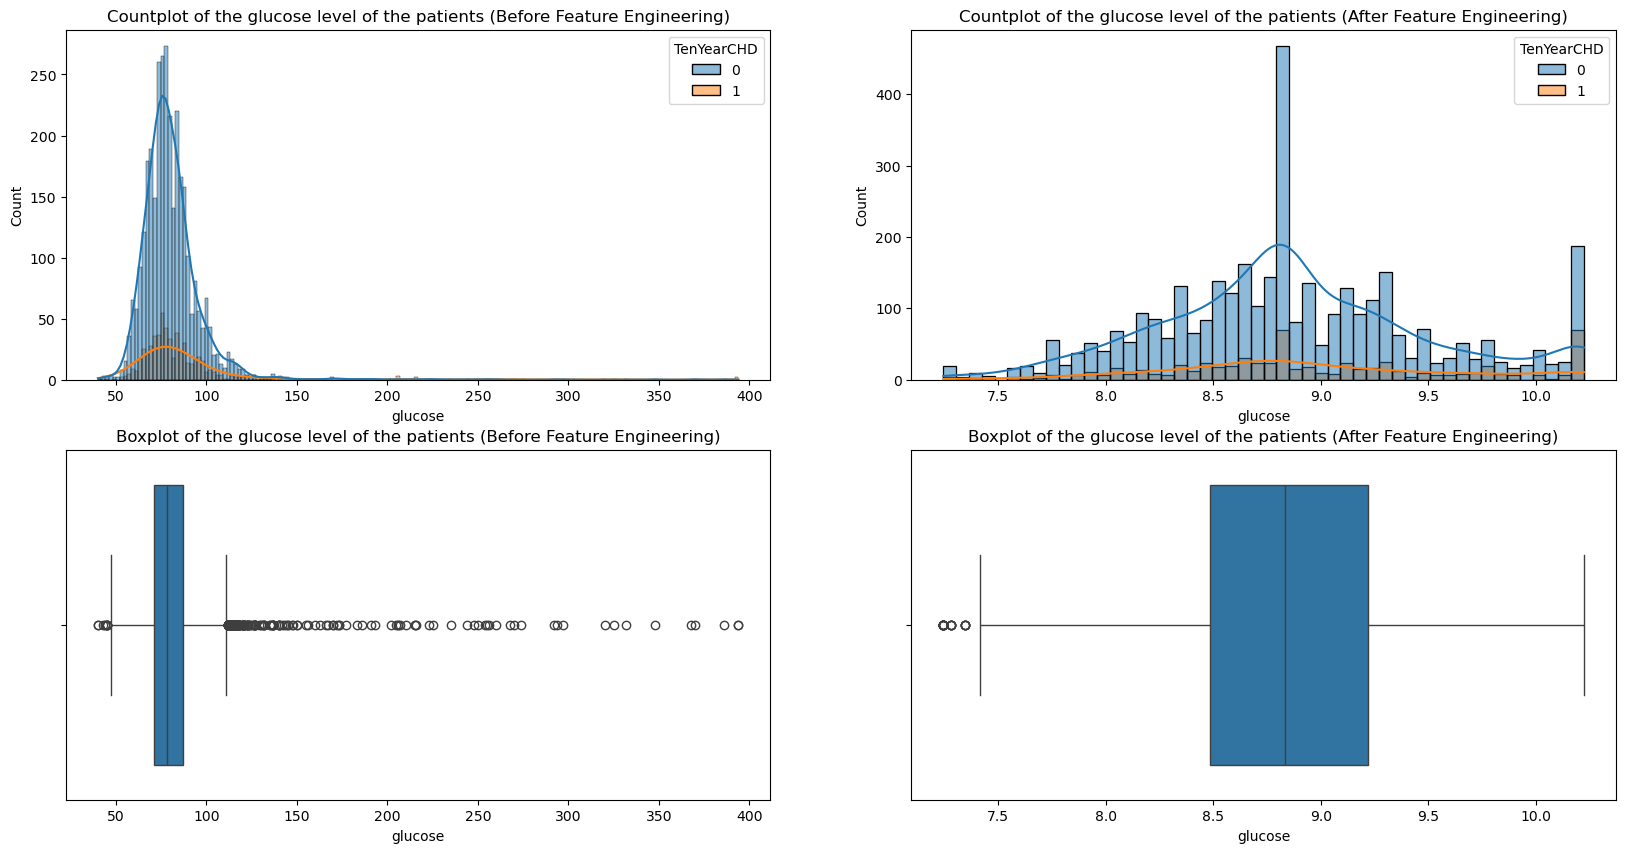

In [61]:
# Rechecking the distribution of the feature
plt.figure(figsize = (20, 10))

# subplot 1 
plt.subplot(2, 2, 1)
sns.histplot(data =df, x = 'glucose', hue = 'TenYearCHD', kde = True)
plt.title('Countplot of the glucose level of the patients (Before Feature Engineering)')

# subplot 2 
plt.subplot(2, 2, 2)
sns.histplot(data =df_new, x = 'glucose', hue = 'TenYearCHD', kde = True, bins = 50)
plt.title('Countplot of the glucose level of the patients (After Feature Engineering)')

# subplot 3
plt.subplot(2, 2, 3)
sns.boxplot(data = df, x = 'glucose')
plt.title('Boxplot of the glucose level of the patients (Before Feature Engineering)')

# subplot 4
plt.subplot(2, 2, 4)
sns.boxplot(data = df_new, x = 'glucose')
plt.title('Boxplot of the glucose level of the patients (After Feature Engineering)')

plt.show()

<h3> Note: Here we don't have to do the encoding of the categorical features because they are already encoded

# Multivariate Analysis

<h4>Pairplot

<Figure size 4000x2000 with 0 Axes>

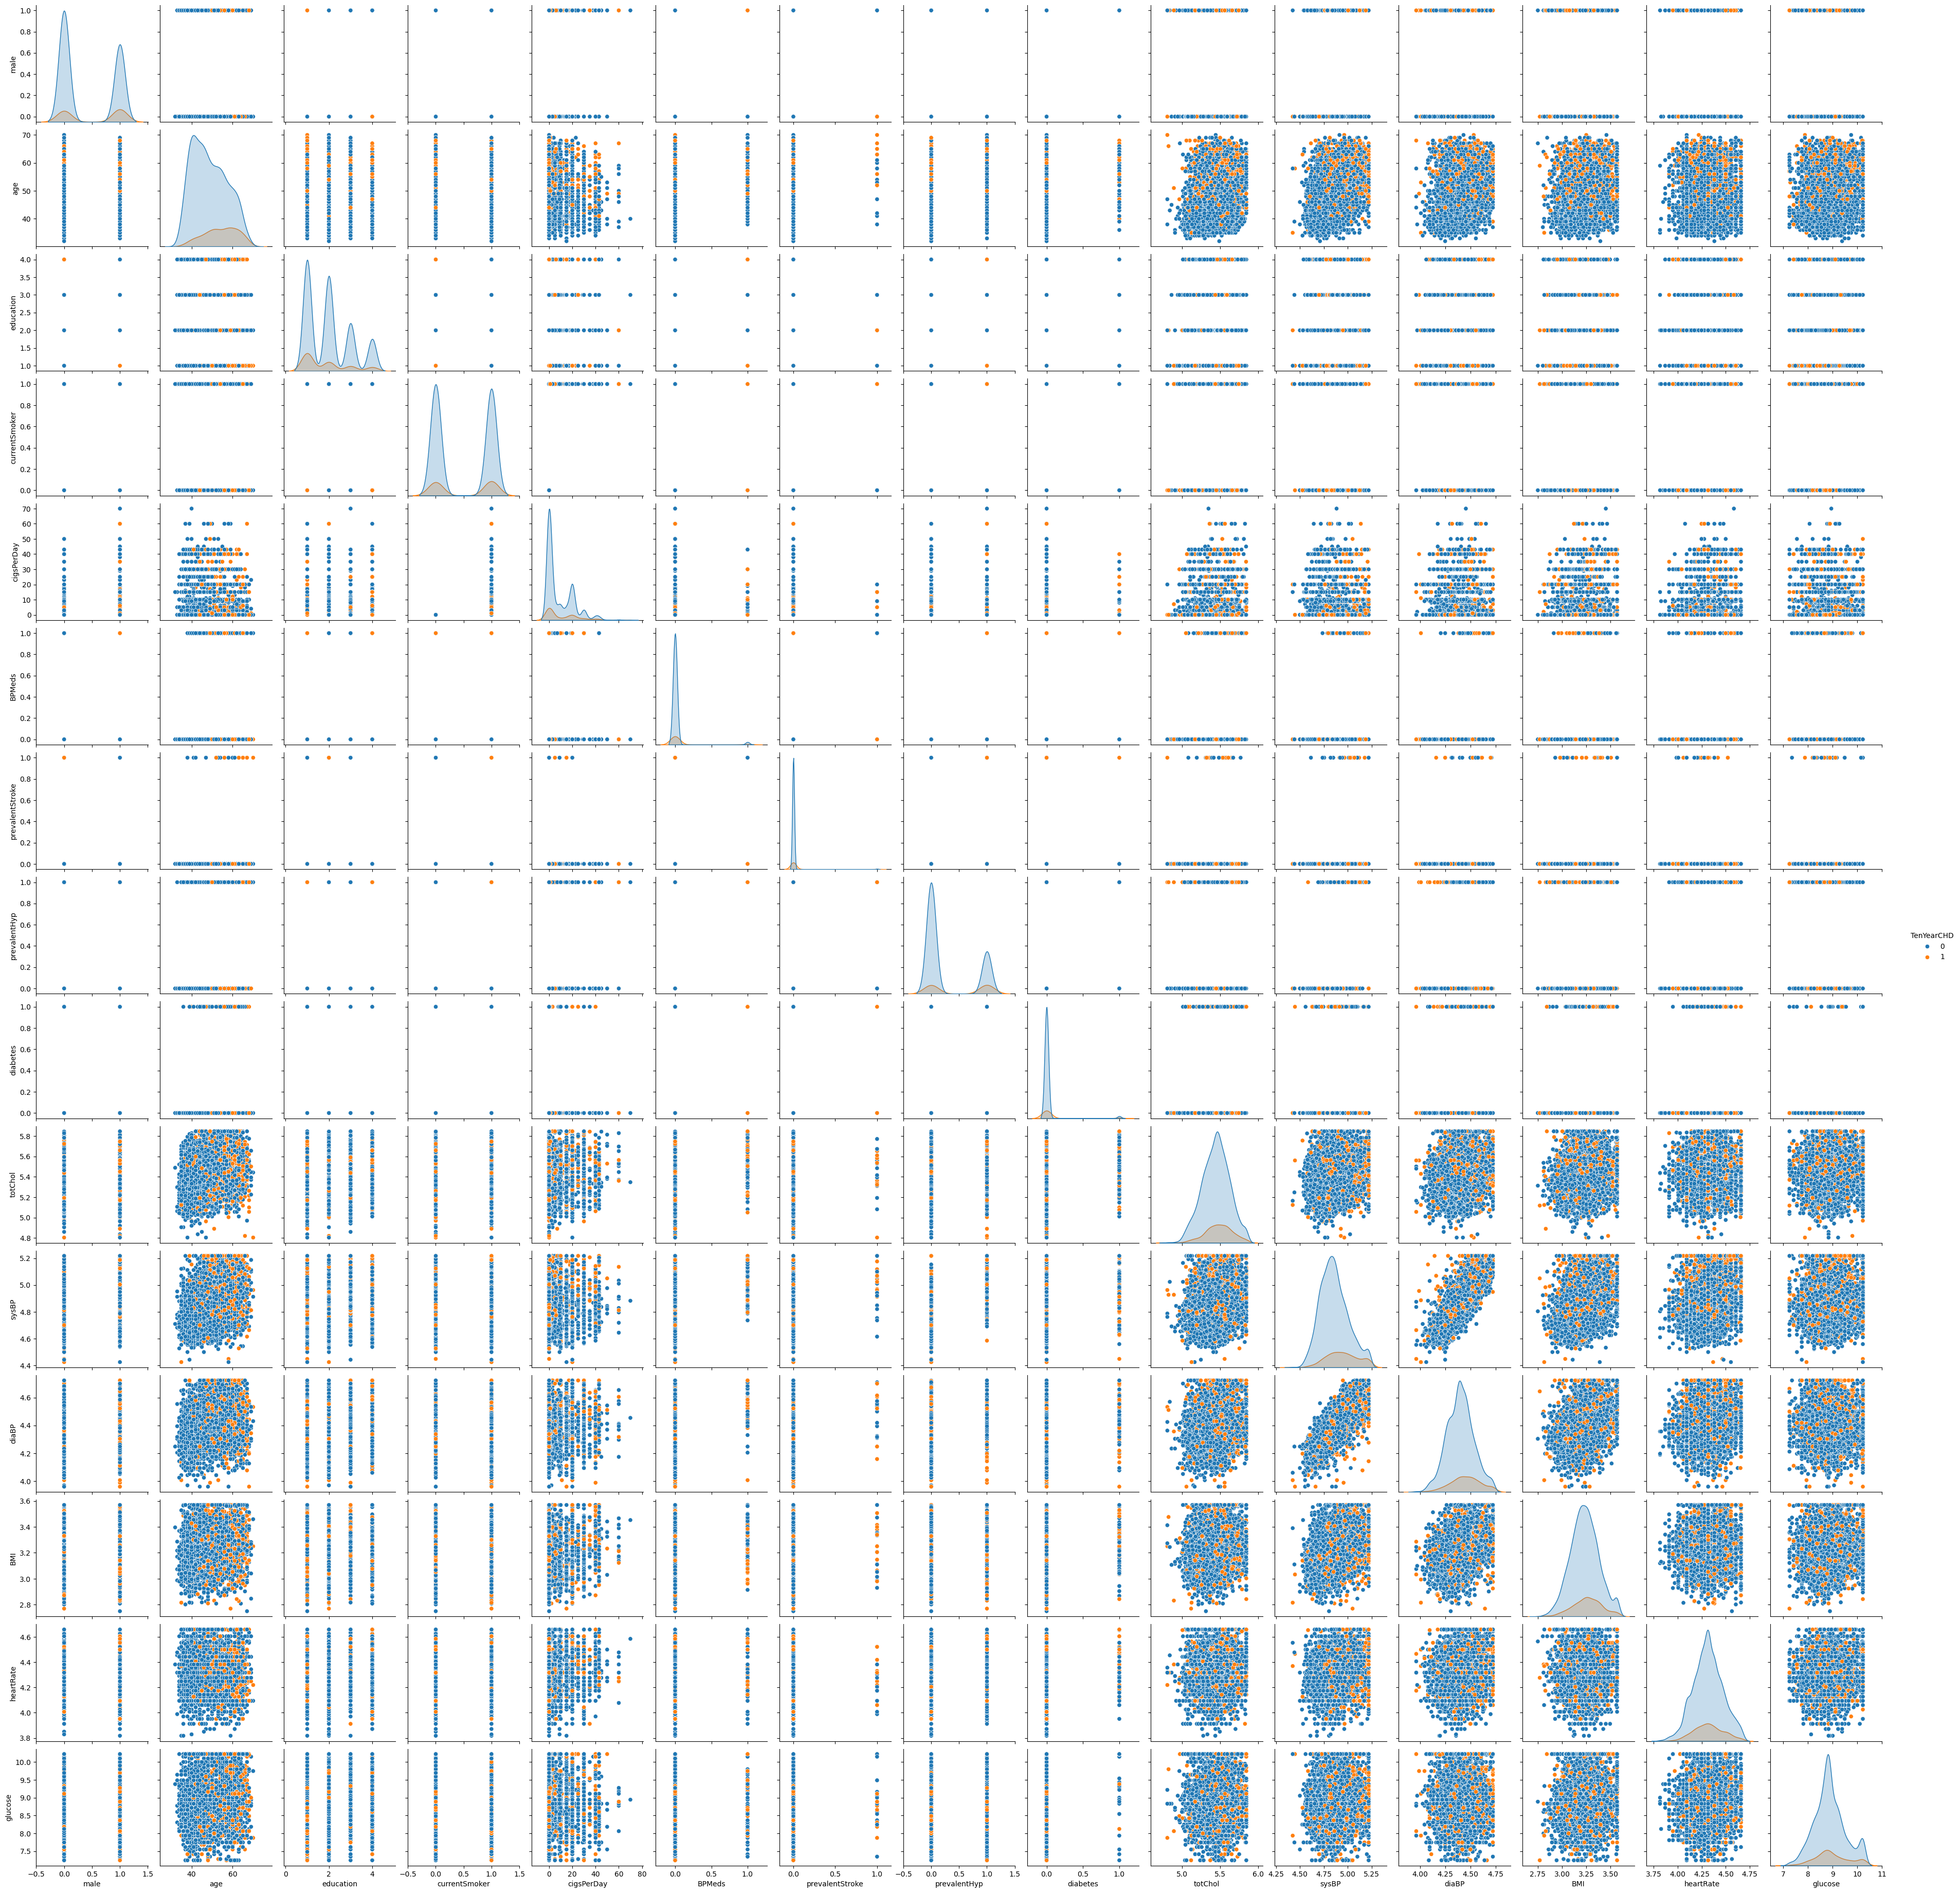

In [62]:
plt.figure(figsize = (40, 20))
sns.pairplot(data = df_new, hue = 'TenYearCHD')
plt.show()

<h4>Correlation Map

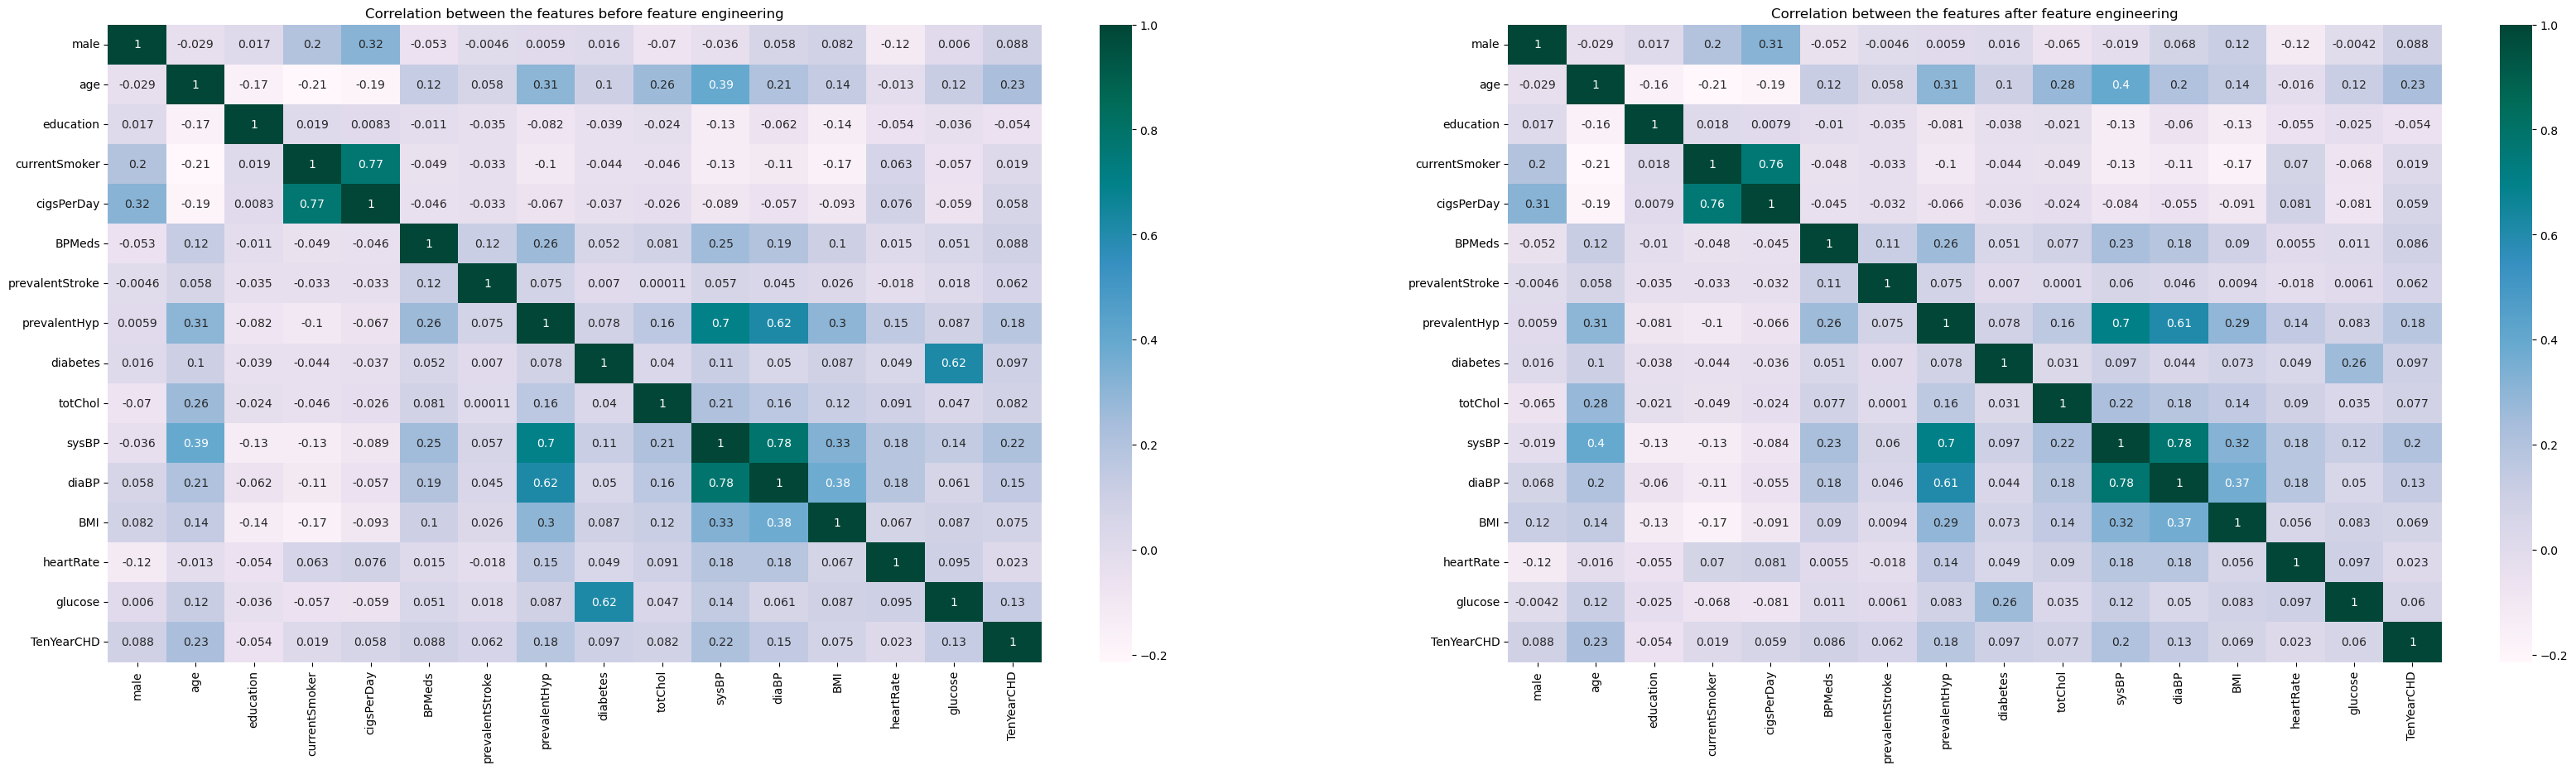

In [63]:
# Checking the correlation between the features before and after doing feature engineering and transformation
plt.figure(figsize = (40, 10))

# subplot 1
plt.subplot(1, 2, 1)
sns.heatmap(df.corr(), annot = True, cmap = 'PuBuGn')
plt.title('Correlation between the features before feature engineering')

# subplot 2
plt.subplot(1, 2, 2)
sns.heatmap(df_new.corr(), annot = True, cmap = 'PuBuGn')
plt.title('Correlation between the features after feature engineering')

plt.show()

# Model Training

In [64]:
# Splitting the dataset into features and target
X = df_new.drop('TenYearCHD', axis = 1)
y = df_new['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 52)

In [65]:
X.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes   totChol     sysBP     diaBP       BMI  heartRate  \
0             0         0  5.273000  4.663439  4.248495  3.294725   4.382027   
1             0         0  5.521461  4.795791  4.394449  3.357942   4.553877   
2             0         0  5.501258  4.848116  4.382027  3.232384   4.317488   
3             1         0  5.416100  5.010635  4.553877  3.352707   4.174387   
4             0         0  5.652489  4.867534  4.430817  3.139833   4.442651   

     glucose  
0   8.774964  
1   8.717798  
2   8.366600  
3  10.148892  
4   9.219544

In [66]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [67]:
# Feature scaling 
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [69]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       713
           1       0.57      0.06      0.11       135

    accuracy                           0.84       848
   macro avg       0.71      0.53      0.51       848
weighted avg       0.80      0.84      0.79       848

Accuracy: 0.8432


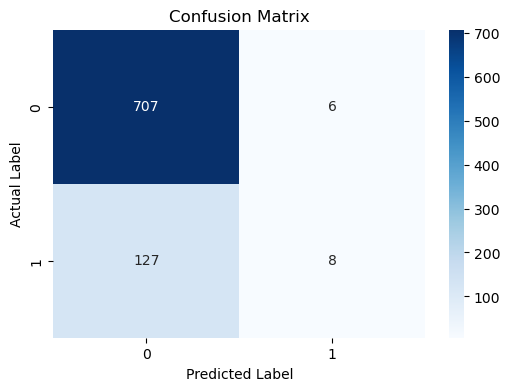

In [70]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

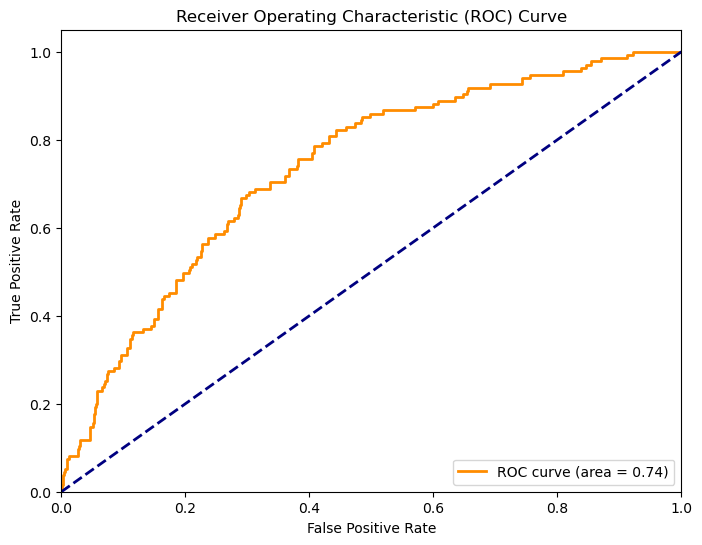

In [71]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()